# -------------------------------Experiment - 07------------------------------------

# Consider the Boston dataset and train multiple linear regression and also evaluate the model using different metrics.

## Inforamation of the columns

#### CRIM: Per capita crime rate by town
#### ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
#### INDUS: Proportion of non-retail business acres per town
#### CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#### NOX: Nitric oxide concentration (parts per 10 million)
#### RM: Average number of rooms per dwelling
#### AGE: Proportion of owner-occupied units built prior to 1940
#### DIS: Weighted distances to five Boston employment centers
#### RAD: Index of accessibility to radial highways
#### TAX: Full-value property tax rate per $10,000
#### LSTAT: Percentage of lower status of the population
#### MEDV: Median value of owner-occupied homes in  1000s

In [1]:
# Import the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Read csv file

df=pd.read_csv("C:/Users/mehta/AIML-20CS51I/DataSets/Boston.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
# Pre-processing

# Show the missing values

df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [4]:
# Drop the unwanted columns

df.drop('Unnamed: 0',axis=1,inplace=True)

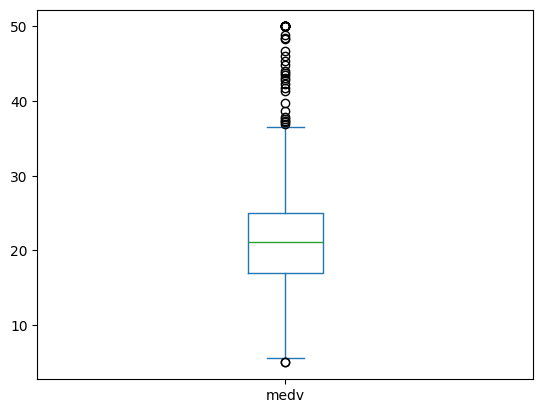

In [5]:
# show the outliers

df['medv'].plot(kind='box')
plt.show()

In [6]:
# Fill the outliers with IQR method 

q1=df['medv'].quantile(0.25)
q3=df['medv'].quantile(0.75)
iqr=q3-q1

upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)

bat_arr=df['medv']
out=bat_arr[(bat_arr<=lower_bound)|(bat_arr>=upper_bound)]                                    
#print(out)

batt_arr=df['medv']
lower_cap=np.percentile(batt_arr,1)
upper_cap=np.percentile(batt_arr,99)

for i in df['medv']:
    if i <lower_bound:
        df['medv']=df['medv'].replace(i,lower_cap)
    elif i >upper_bound:
        df['medv']=df['medv'].replace(i,upper_cap)


<Axes: >

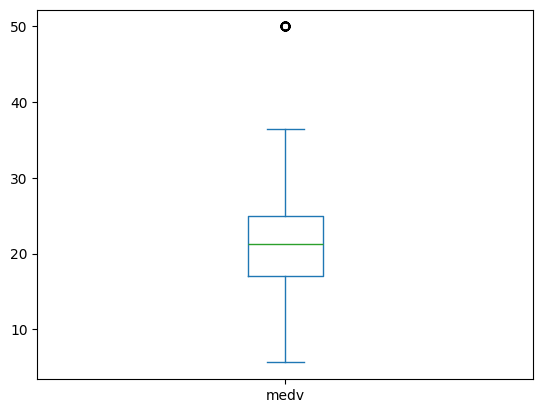

In [7]:
df["medv"].plot(kind='box')        

In [8]:
# Split the data into training and testing 75:25 ratio 

X = df.drop('medv', axis=1)
y = df['medv']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
# Train the model using lenear regrassion 
# Fit the model 

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
# Predict the mmodel

y_pred = model.predict(X_test)

In [12]:
# Evaluation metrics for model

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root mean squar is (RMSE):", rmse)
print("R2 is :",r2)

Mean Squared Error (MSE): 25.426751040268044
Root mean squar is (RMSE): 5.0424945255565765
R2 is : 0.6677883755294447
